# **Proyek Analisis Data: Bike Sharing Dataset**
- **Nama:** Muhammad Erlangga Prasetya
- **Email:** 2110631170078@student.unsika.ac.id
- **ID Dicoding:** erlanggs

## **Menentukan Pertanyaan Bisnis**

- Bagaimana pengaruh faktor cuaca terhadap jumlah pengguna bike sharing?
- Pada jam berapa penggunaan bike sharing paling tinggi dalam sehari?
- Bagaimana tren penggunaan bike sharing berdasarkan hari dalam seminggu?
- Apakah terdapat perbedaan penggunaan bike sharing pada musim panas dibandingkan musim dingin?


## **Import Library**

In [204]:
# Mengimport semua library yang dibutuhkan

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## **Data Wrangling**

### **Gathering Data**

In [205]:
# Memuat dataset day.csv dan hour.csv
d_df = pd.read_csv("day.csv")
h_df = pd.read_csv("hour.csv")

In [206]:
# Memuat tabel day
d_df.head()
h_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### **Assessing Data**

In [207]:
# Memeriksa tipe data data dari tiap kolom yang terdapat dalam hour_df dan day_df.
h_df.info()
d_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex:

Dataset h_df memiliki 17 kolom dengan 17.379 baris, sedangkan d_df memiliki 10 kolom dengan 731 baris. Kolom ini memiliki berbagai tipe data seperti integer, float, dan object. Informasi ini memberikan gambaran awal tentang struktur data dataset yang digunakan.

In [208]:
# Mengecek missing value
print("Missing values pada h_df:\n", h_df.isna().sum())
print("Missing values pada d_df:\n", d_df.isna().sum())

Missing values pada h_df:
 instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
Missing values pada d_df:
 instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


Hasil pengecekan missing value menunjukkan bahwa tidak ada nilai yang hilang maupun duplikasi, yang artinya data cukup bersih untuk langsung dianalisis.

In [209]:
# Memeriksa duplikasi
print("Jumlah duplikasi: ", h_df.duplicated().sum())
print("Jumlah duplikasi: ", d_df.duplicated().sum())

Jumlah duplikasi:  0
Jumlah duplikasi:  0


### Cleaning Data

In [210]:
# Menghapus kolom instant dan workingday
h_df.drop(['instant', 'workingday'], axis=1, inplace=True)
d_df.drop(['instant', 'workingday'], axis=1, inplace=True)

 Menghapus kolom instant dan workingday karena tidak relevan untuk analisis ini.

In [211]:
# Mengubah tipe data int menjadi category
columns = ['season', 'mnth', 'holiday', 'weekday', 'weathersit']
for column in columns:
    d_df[column] = d_df[column].astype("category")
    h_df[column] = h_df[column].astype("category")

In [212]:
# Mengubah tipe data object menjadi datetime
d_df['dteday'] = pd.to_datetime(d_df['dteday'])
h_df['dteday'] = pd.to_datetime(h_df['dteday'])

In [213]:
# Mengganti nama kolom agar lebih mudah dibaca
d_df.rename(columns={'yr':'year','mnth':'month','weekday':'one_of_week', 'weathersit':'weather_situation',
                       'windspeed':'wind_speed','cnt':'count_cr','hum':'humidity'}, inplace=True)
h_df.rename(columns={'yr':'year','hr':'hours','mnth':'month','weekday':'one_of_week', 'weathersit':'weather_situation',
                        'windspeed':'wind_speed','cnt':'count_cr','hum':'humidity'}, inplace=True)

Mengganti nama kolom agar lebih deskriptif dan mudah dipahami.

In [214]:
# Mengubah nilai kolom season menjadi nama musim
d_df.season.replace((1, 2, 3, 4), ('Spring', 'Summer', 'Fall', 'Winter'), inplace=True)
h_df.season.replace((1, 2, 3, 4), ('Spring', 'Summer', 'Fall', 'Winter'), inplace=True)

In [215]:
# Mengubah nilai kolom month menjadi nama bulan
d_df.month.replace(range(1, 13), ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'), inplace=True)
h_df.month.replace(range(1, 13), ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'), inplace=True)

In [216]:
# Mengubah nilai kolom weather_situation menjadi deskripsi
d_df.weather_situation.replace((1, 2, 3, 4), ('Clear', 'Misty', 'Light_rainsnow', 'Heavy_rainsnow'), inplace=True)
h_df.weather_situation.replace((1, 2, 3, 4), ('Clear', 'Misty', 'Light_rainsnow', 'Heavy_rainsnow'), inplace=True)

In [217]:
# Mengubah nilai kolom one_of_week menjadi nama hari
d_df.one_of_week.replace(range(7), ('Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'), inplace=True)
h_df.one_of_week.replace(range(7), ('Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'), inplace=True)

In [218]:
# Mengubah nilai kolom year menjadi tahun
d_df.year.replace((0, 1), ('2011', '2012'), inplace=True)
h_df.year.replace((0, 1), ('2011', '2012'), inplace=True)

In [219]:
# Menghitung Humidity
d_df['humidity'] = d_df['humidity'] * 100
h_df['humidity'] = h_df['humidity'] * 100

In [220]:
# Membuat kolom baru "category_days" untuk menunjukkan weekday atau weekend
def get_category_days(one_of_week):
    return "weekend" if one_of_week in ["Saturday", "Sunday"] else "weekdays"

h_df["category_days"] = h_df["one_of_week"].apply(get_category_days)
d_df["category_days"] = d_df["one_of_week"].apply(get_category_days)

In [221]:
# Mengkategorikan tingkat kelembaban
def classify_humidity(humidity):
    if humidity < 45:
        return "Terlalu kering"
    elif 45 <= humidity < 65:
        return "Ideal"
    else:
        return "Terlalu lembab"

h_df["humidity_category"] = h_df["humidity"].apply(classify_humidity)
d_df["humidity_category"] = d_df["humidity"].apply(classify_humidity)


*   Mengkonversi kelembaban dari skala 0-1 menjadi persentase (0-100).
*   Menambahkan kolom baru untuk mengkategorikan hari menjadi weekday atau weekend.
*   Membuat kategori baru berdasarkan nilai kelembaban, misalnya kelembaban rendah, sedang, atau tinggi.



## **Exploratory Data Analysis (EDA)**

In [222]:
print(d_df.describe(include="all"))

                     dteday season  year month  holiday one_of_week  \
count                   731    731   731   731    731.0         731   
unique                  NaN      4     2    12      2.0           7   
top                     NaN   Fall  2012   Jan      0.0      Sunday   
freq                    NaN    188   366    62    710.0         105   
mean    2012-01-01 00:00:00    NaN   NaN   NaN      NaN         NaN   
min     2011-01-01 00:00:00    NaN   NaN   NaN      NaN         NaN   
25%     2011-07-02 12:00:00    NaN   NaN   NaN      NaN         NaN   
50%     2012-01-01 00:00:00    NaN   NaN   NaN      NaN         NaN   
75%     2012-07-01 12:00:00    NaN   NaN   NaN      NaN         NaN   
max     2012-12-31 00:00:00    NaN   NaN   NaN      NaN         NaN   
std                     NaN    NaN   NaN   NaN      NaN         NaN   

       weather_situation        temp       atemp    humidity  wind_speed  \
count                731  731.000000  731.000000  731.000000  731.00000

Output:

* count: Jumlah nilai non-kosong.
* unique: Jumlah nilai unik (hanya untuk data kategorikal).
* top: Nilai yang paling sering muncul (kategorikal).
* mean: Rata-rata (untuk numerik).
* min, max: Nilai minimum dan maksimum.
25%, 50%, 75%: Persentil (nilai tengah dari data).

Hasil Utama:
* Kolom Kategorikal:
  * season: Ada 4 musim, dengan Fall paling sering muncul.
 *  year: Ada dua tahun, dengan 2012 lebih sering muncul.
  * holiday: Sebagian besar data adalah hari non-libur.
  * one_of_week: Hari Minggu muncul paling sering.


* Kolom Numerik:
  * temp: Suhu rata-rata adalah 0.495, berkisar dari 0.059 hingga 0.861.
  * humidity: Rata-rata kelembaban sekitar 62.79%, dengan maksimum 97.25%.
  * wind_speed: Rata-rata kecepatan angin 0.19.
  * casual: Rata-rata 848 pengguna tidak terdaftar per hari, dengan maksimum 3.410.
  * registered: Rata-rata 3.656 pengguna terdaftar, maksimum 6.946.
  * count_cr: Penyewaan sepeda harian rata-rata 4.504, maksimum 8.714.

In [223]:
print(h_df.describe(include="all"))

                               dteday season   year  month         hours  \
count                           17379  17379  17379  17379  17379.000000   
unique                            NaN      4      2     12           NaN   
top                               NaN   Fall   2012    May           NaN   
freq                              NaN   4496   8734   1488           NaN   
mean    2012-01-02 04:08:34.552045568    NaN    NaN    NaN     11.546752   
min               2011-01-01 00:00:00    NaN    NaN    NaN      0.000000   
25%               2011-07-04 00:00:00    NaN    NaN    NaN      6.000000   
50%               2012-01-02 00:00:00    NaN    NaN    NaN     12.000000   
75%               2012-07-02 00:00:00    NaN    NaN    NaN     18.000000   
max               2012-12-31 00:00:00    NaN    NaN    NaN     23.000000   
std                               NaN    NaN    NaN    NaN      6.914405   

        holiday one_of_week weather_situation          temp         atemp  \
count   17

Kolom Kategorikal:

* season: Ada 4 musim, dan musim Fall muncul paling sering (4.496 kali).
* year: Data dibagi antara 2011 dan 2012, dengan tahun 2012 lebih dominan (8.734 kali).
* month: Terdapat 12 bulan, dan Mei adalah bulan paling sering muncul (1.488 kali).
* holiday: Mayoritas data adalah hari non-libur (16.879 kali).
* one_of_week: Sabtu adalah hari yang paling sering muncul (2.512 kali).
* weather_situation: Cuaca paling sering adalah Clear (11.413 kali).


Kolom Numerik:

* hours: Rentang jam mulai dari 0 hingga 23, dengan rata-rata pada pukul 11.54 (hampir tengah hari).
* temp (suhu): Suhu rata-rata sekitar 0.497 (berkisar dari 0.02 hingga 1.0).
* humidity (kelembaban): Rata-rata kelembaban sekitar 62.72%, dengan maksimum 100%.
* wind_speed: Rata-rata kecepatan angin adalah 0.19, dengan maksimum 0.85.
* casual: Jumlah rata-rata pengguna kasual per jam adalah 35.67, dengan maksimum 367.
* registered: Rata-rata pengguna terdaftar per jam adalah 153.78, dengan maksimum 886.
* count_cr: Total rata-rata penyewaan sepeda per jam adalah 189.46, dengan maksimum 977.


Kolom Tambahan:

* category_days: Ada dua kategori hari, dengan weekdays muncul lebih sering (12.365 kali).
* humidity_category: Kategori kelembaban menunjukkan kelembaban terlalu lembab muncul paling sering (8.356 kali).

In [224]:
# Jumlah Penyewaan per Musim
seasonal_rentals = d_df.groupby("season").agg({"count_cr": "sum"}).reset_index()
seasonal_rentals = seasonal_rentals.sort_values(by="count_cr", ascending=False)
print("Jumlah Penyewaan per Musim:\n", seasonal_rentals)

Jumlah Penyewaan per Musim:
    season  count_cr
2    Fall   1061129
1  Summer    918589
3  Winter    841613
0  Spring    471348


Musim dengan total penyewaan terbanyak adalah Fall (1.061.129 penyewaan), disusul oleh Summer (918.589 penyewaan). Spring memiliki jumlah penyewaan paling sedikit (471.348 penyewaan). Ini menunjukkan bahwa penyewaan sepeda cenderung lebih populer pada musim gugur dan musim panas.

In [225]:
# Jumlah Penyewaan per Tahun berdasarkan Registered dan Casual
yearly_usage = d_df.groupby("year").agg({
    "registered": ["sum"],
    "casual": ["sum"]
}).reset_index()
print("Jumlah Penyewaan per Tahun:\n", yearly_usage)

Jumlah Penyewaan per Tahun:
    year registered  casual
               sum     sum
0  2011     995851  247252
1  2012    1676811  372765


* Pada tahun 2011, total penyewaan oleh pengguna terdaftar adalah 995.851, sedangkan oleh pengguna kasual adalah 247.252.

* Pada tahun 2012, terjadi peningkatan dengan total penyewaan oleh pengguna terdaftar sebesar 1.676.811, dan oleh pengguna kasual sebesar 372.765.
Tahun 2012 memiliki peningkatan yang signifikan baik untuk penyewaan pengguna terdaftar maupun kasual dibandingkan tahun 2011.

In [226]:
# Jumlah Penyewaan per Bulan
monthly_usage = d_df.groupby("month").agg({"count_cr": "sum"}).reset_index()
monthly_usage = monthly_usage.sort_values(by="month")
print("Jumlah Penyewaan per Bulan:\n", monthly_usage)

Jumlah Penyewaan per Bulan:
    month  count_cr
0    Jan    134933
1    Feb    151352
2    Mar    228920
3    Apr    269094
4    May    331686
5    Jun    346342
6    Jul    344948
7    Aug    351194
8    Sep    345991
9    Oct    322352
10   Nov    254831
11   Dec    211036


* Penyewaan sepeda meningkat secara signifikan selama bulan Mei hingga September, dengan puncaknya pada bulan Agustus (351.194 penyewaan).

* Januari dan Februari memiliki jumlah penyewaan paling sedikit, yaitu 134.933 dan 151.352 penyewaan, kemungkinan karena cuaca yang lebih dingin.


## **Visualization & Explanatory Analysis**

### **Pertanyaan 1:  Bagaimana pengaruh faktor cuaca terhadap jumlah pengguna bike sharing?**

In [227]:
# Pertanyaan 1
weather_usage = h_df.groupby("weather_situation").agg({"count_cr": "sum"}).reset_index()
print("Total Penyewaan per Situasi Cuaca:\n", weather_usage)

Total Penyewaan per Situasi Cuaca:
   weather_situation  count_cr
0             Clear   2338173
1             Misty    795952
2    Light_rainsnow    158331
3    Heavy_rainsnow       223


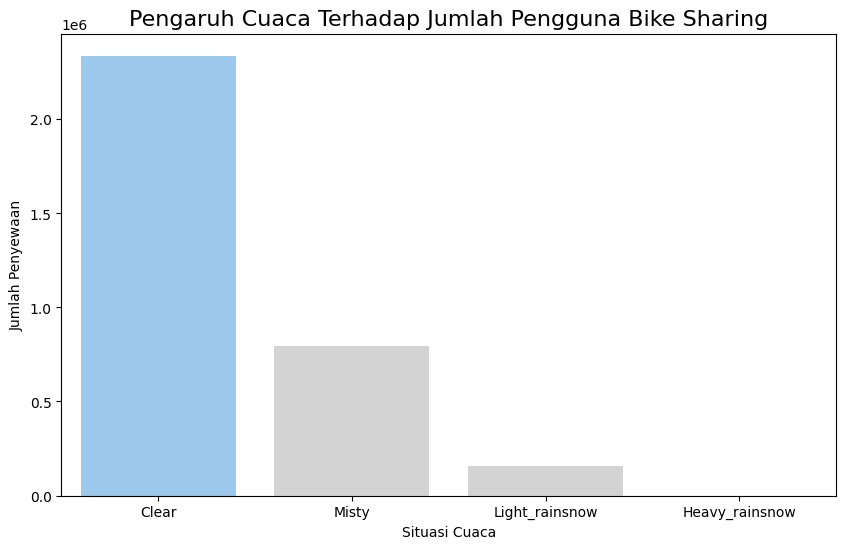

In [242]:
# Visualisasi pertanyaan 1
colors = ["#90CAF9", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
plt.figure(figsize=(10, 6))
sns.barplot(x='weather_situation', y='count_cr', data=weather_usage, palette=colors)
plt.title('Pengaruh Cuaca Terhadap Jumlah Pengguna Bike Sharing', fontsize=16)
plt.xlabel('Situasi Cuaca')
plt.ylabel('Jumlah Penyewaan')
plt.show()

Keterangan Output :

* Cuaca Cerah (Clear): Total penyewaan sepeda tertinggi terjadi ketika cuaca cerah, yaitu sebesar 2.338.173 penyewaan. Ini menunjukkan bahwa pengguna lebih memilih untuk menggunakan sepeda saat cuaca mendukung, seperti pada hari yang cerah.

* Cuaca Berkabut (Misty): Penyewaan sepeda menurun secara signifikan saat cuaca berkabut, dengan total 795.952 penyewaan. Meskipun berkabut, ini masih merupakan cuaca yang relatif tidak terlalu ekstrem, sehingga masih ada banyak pengguna yang tetap menggunakan sepeda.

* Hujan atau Salju Ringan (Light Rain/Snow): Pada kondisi hujan atau salju ringan, jumlah penyewaan turun drastis menjadi 158.331. Ini menunjukkan bahwa kondisi hujan atau salju ringan sudah cukup untuk mengurangi minat pengguna dalam menyewa sepeda.

* Hujan atau Salju Lebat (Heavy Rain/Snow): Kondisi cuaca ekstrem seperti hujan atau salju lebat hampir menghilangkan aktivitas penyewaan sepeda, dengan hanya 223 penyewaan yang tercatat. Ini sangat wajar karena kondisi tersebut membuat bersepeda menjadi tidak nyaman atau bahkan berbahaya.


### **Pertanyaan 2: Pada jam berapa penggunaan bike sharing paling tinggi dalam sehari?**

In [229]:
# Pertanyaan 2
hourly_usage = h_df.groupby("hours").agg({"count_cr": "sum"}).reset_index()
print("Total Penyewaan per Jam:\n", hourly_usage)

Total Penyewaan per Jam:
     hours  count_cr
0       0     39130
1       1     24164
2       2     16352
3       3      8174
4       4      4428
5       5     14261
6       6     55132
7       7    154171
8       8    261001
9       9    159438
10     10    126257
11     11    151320
12     12    184414
13     13    184919
14     14    175652
15     15    183149
16     16    227748
17     17    336860
18     18    309772
19     19    226789
20     20    164550
21     21    125445
22     22     95612
23     23     63941


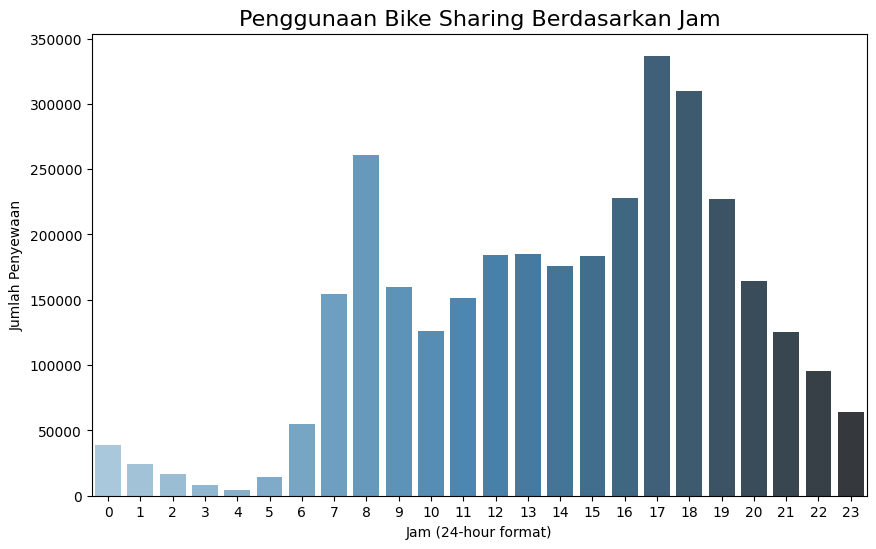

In [230]:
# Visualisasi Pertanyaan 2
plt.figure(figsize=(10, 6))
sns.barplot(x='hours', y='count_cr', data=hourly_usage, palette="Blues_d")
plt.title('Penggunaan Bike Sharing Berdasarkan Jam', fontsize=16)
plt.xlabel('Jam (24-hour format)')
plt.ylabel('Jumlah Penyewaan')
plt.show()

Keterangan Output:

* Puncak tertinggi terjadi pada pukul 17.00 (336.860 penyewaan), yang menunjukkan banyak orang menyewa sepeda saat pulang kerja.
* Pukul 08.00 (261.001 penyewaan) juga memiliki penggunaan tinggi, mungkin karena banyak yang menyewa sepeda untuk berangkat kerja atau aktivitas pagi.
* Waktu penggunaan yang signifikan lainnya adalah pukul 12.00 (184.414), kemungkinan terkait dengan jam istirahat makan siang.


Kesimpulan:

Penggunaan bike sharing paling tinggi terjadi pada jam sibuk, seperti pukul 08.00 dan 17.00, menunjukkan bahwa banyak orang menggunakan sepeda untuk perjalanan kerja.



### **Pertanyaan 3: Bagaimana tren penggunaan bike sharing berdasarkan hari dalam seminggu?**

In [231]:
# Pertanyaan 3
weekly_usage = h_df.groupby("one_of_week").agg({"count_cr": "sum"}).reset_index()
print("Total Penyewaan per Hari dalam Seminggu:\n", weekly_usage)

Total Penyewaan per Hari dalam Seminggu:
   one_of_week  count_cr
0      Sunday    444027
1      Monday    455503
2     Tuesday    469109
3   Wednesday    473048
4    Thursday    485395
5      Friday    487790
6    Saturday    477807


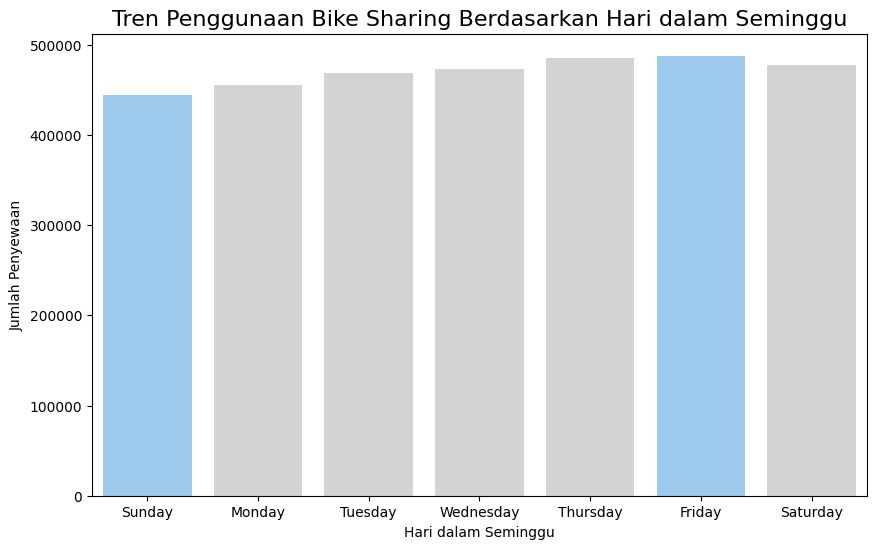

In [232]:
# Visualisasi Pertanyaan 3
colors = ["#90CAF9", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#90CAF9", "#D3D3D3"]
plt.figure(figsize=(10, 6))
sns.barplot(x='one_of_week', y='count_cr', data=weekly_usage, palette=colors)
plt.title('Tren Penggunaan Bike Sharing Berdasarkan Hari dalam Seminggu', fontsize=16)
plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Jumlah Penyewaan')
plt.show()

Keterangan Output:

* Penggunaan tertinggi terjadi pada hari Jumat (487.790 penyewaan), diikuti oleh Kamis dan Sabtu.
* Hari Minggu (444.027) memiliki penggunaan paling rendah, mungkin karena hari libur.

### **Pertanyaan 4: Apakah terdapat perbedaan penggunaan bike sharing pada musim panas dibandingkan musim dingin?**

In [233]:
# Pertanyaan 4
seasonal_usage = d_df.groupby("season").agg({"count_cr": "sum"}).reset_index()
print("Total Penyewaan per Musim:\n", seasonal_usage)

Total Penyewaan per Musim:
    season  count_cr
0  Spring    471348
1  Summer    918589
2    Fall   1061129
3  Winter    841613


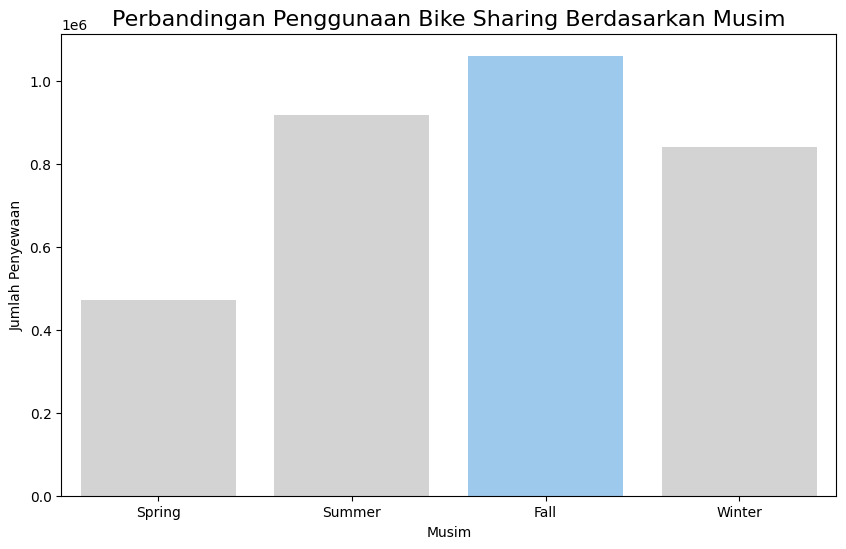

In [234]:
# Visualisasi Pertanyaan 4
colors = ["#D3D3D3", "#D3D3D3", "#90CAF9", "#D3D3D3"]
plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='count_cr', data=seasonal_usage, palette=colors)
plt.title('Perbandingan Penggunaan Bike Sharing Berdasarkan Musim', fontsize=16)
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan')
plt.show()

Keterangan:

* Penggunaan tertinggi terjadi pada musim gugur (Fall), dengan 1.061.129 penyewaan.
* Musim panas (Summer) juga cukup tinggi dengan 918.589 penyewaan.
* Musim dingin (Winter) memiliki penyewaan yang lebih rendah dibandingkan musim panas, yaitu 841.613 penyewaan, namun masih lebih tinggi daripada musim semi.

## Kesimpulan


*   Kesimpulan pertanyaan 1 :
Faktor cuaca memiliki pengaruh yang sangat besar terhadap jumlah pengguna layanan bike sharing. Pengguna cenderung lebih aktif menyewa sepeda saat cuaca cerah, dan sebaliknya, aktivitas penyewaan menurun drastis ketika cuaca buruk seperti hujan atau salju lebat. Dengan memahami pola ini, pengelola layanan bike sharing bisa lebih baik dalam merencanakan ketersediaan sepeda, misalnya dengan mengurangi sepeda di hari-hari cuaca buruk dan memaksimalkan layanan saat cuaca cerah.

*   Kesimpulan pertanyaan 2 :
Penggunaan bike sharing lebih tinggi selama hari kerja, terutama di akhir pekan Jumat dan Sabtu, dan lebih rendah pada hari Minggu.

*   Kesimpulan pertanyaan 3 :
Penggunaan bike sharing lebih tinggi selama hari kerja, terutama di akhir pekan Jumat dan Sabtu, dan lebih rendah pada hari Minggu.

*   Kesimpulan pertanyaan 4 :
Ada perbedaan yang jelas dalam penggunaan bike sharing antara musim panas dan musim dingin. Meskipun musim dingin masih digunakan, jumlah penyewaan lebih tinggi pada musim panas dan gugur, saat cuaca lebih bersahabat untuk bersepeda.

## **Analisis Lanjutan Clustering (Manual Grouping dan Binning)**





Saya menggunakan clustering melalui manual grouping dan binning karena beberapa alasan sebagai berikut :

* Metode ini lebih sederhana dan langsung untuk menganalisis pola penyewaan berdasarkan jumlah.
* Fokus pada jumlah penyewaan sepeda lebih relevan untuk analisis ini daripada lokasi (geospatial analysis) atau perilaku pelanggan (RFM).
* Hasil yang dihasilkan lebih mudah dipahami dan diinterpretasikan, membantu dalam membuat keputusan yang lebih cepat.

In [235]:
# Mengelompokkan penyewaan berdasarkan jumlah penyewaan (count_cr)
def categorize_usage(count):
    if count < 20:
        return "Rendah"
    elif 20 <= count < 50:
        return "Sedang"
    else:
        return "Tinggi"

In [236]:
# Menggunakan manual grouping untuk h_df
h_df['usage_category'] = h_df['count_cr'].apply(categorize_usage)

Membuat fungsi categorize_usage untuk mengelompokkan data penyewaan sepeda berdasarkan nilai penyewaan (count_cr).

In [237]:
# Melihat distribusi kategori penyewaan
usage_distribution = h_df['usage_category'].value_counts().reset_index()
usage_distribution.columns = ['Usage Category', 'Count']
print("Distribusi Kategori Penyewaan:\n", usage_distribution)

Distribusi Kategori Penyewaan:
   Usage Category  Count
0         Tinggi  12558
1         Rendah   2903
2         Sedang   1918


Keterangan Output :

* Penyewaan tertinggi berada pada kategori "Tinggi" (lebih dari 50 penyewaan) sebanyak 12.558 kali.
* Kategori "Rendah" (kurang dari 20 penyewaan) terjadi sebanyak 2.903 kali.
* Kategori "Sedang" (20-50 penyewaan) terjadi sebanyak 1.918 kali.

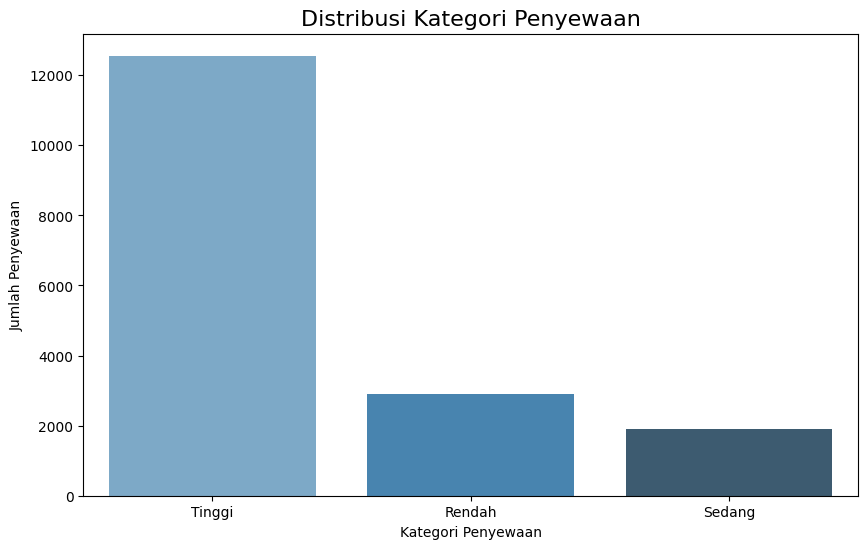

In [238]:
# Visualisasi distribusi kategori penyewaan
plt.figure(figsize=(10, 6))
sns.barplot(x='Usage Category', y='Count', data=usage_distribution, palette="Blues_d")
plt.title('Distribusi Kategori Penyewaan', fontsize=16)
plt.xlabel('Kategori Penyewaan')
plt.ylabel('Jumlah Penyewaan')
plt.show()

In [239]:
# Binning untuk clustering berdasarkan count_cr
bins = [0, 20, 50, 100, np.inf]
labels = ['Rendah', 'Sedang', 'Tinggi', 'Sangat Tinggi']
h_df['clustering'] = pd.cut(h_df['count_cr'], bins=bins, labels=labels)

 Menggunakan teknik binning untuk membagi jumlah penyewaan (count_cr) ke dalam 4 kelompok berdasarkan nilai count_cr dengan label berikut:

* Rendah: Di bawah 20 penyewaan.
* Sedang: 20 hingga 50 penyewaan.
* Tinggi: 50 hingga 100 penyewaan.
* Sangat Tinggi: Di atas 100 penyewaan. Teknik ini mempermudah kita melihat distribusi data dalam kluster yang lebih terperinci.

In [240]:
# Melihat distribusi clustering
clustering_distribution = h_df['clustering'].value_counts().reset_index()
clustering_distribution.columns = ['Clustering', 'Count']
print("Distribusi Clustering Berdasarkan Jumlah Penyewaan:\n", clustering_distribution)

Distribusi Clustering Berdasarkan Jumlah Penyewaan:
       Clustering  Count
0  Sangat Tinggi  10344
1         Rendah   2994
2         Tinggi   2159
3         Sedang   1882


Dari hasil output ini, dapat dilihat distribusi data penyewaan berdasarkan kluster:
* Sangat Tinggi: 10.344 penyewaan terjadi lebih dari 100 kali dalam satu waktu.
* Rendah: 2.994 penyewaan terjadi kurang dari 20 kali.
* Tinggi: 2.159 penyewaan terjadi antara 50 hingga 100 kali.
* Sedang: 1.882 penyewaan terjadi antara 20 hingga 50 kali.


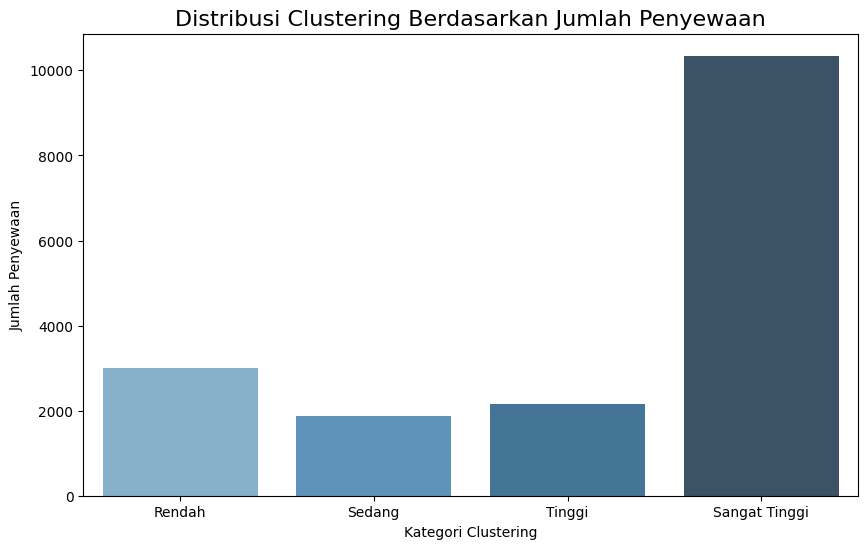

In [241]:
# Visualisasi distribusi clustering
plt.figure(figsize=(10, 6))
sns.barplot(x='Clustering', y='Count', data=clustering_distribution, palette="Blues_d")
plt.title('Distribusi Clustering Berdasarkan Jumlah Penyewaan', fontsize=16)
plt.xlabel('Kategori Clustering')
plt.ylabel('Jumlah Penyewaan')
plt.show()

Kesimpulan dari Analisis Lanjutan :

* Manual Grouping:

  * Dengan menggunakan categorize_usage, saya bisa mengelompokkan data penyewaan secara sederhana ke dalam tiga kategori. Hasilnya menunjukkan bahwa sebagian besar penyewaan berada dalam kategori "Tinggi," yang berarti ada cukup banyak periode waktu dengan jumlah penyewaan yang tinggi.

* Clustering dengan Binning:

  * Binning yang lebih rinci menunjukkan bahwa penyewaan dalam kategori "Sangat Tinggi" sangat dominan, mencerminkan bahwa pada banyak waktu, jumlah penyewaan melebihi 100 kali dalam satu jam.

* Pemanfaatan Teknik Clustering dan Binning:

  * Teknik clustering dan binning memberikan pemahaman yang lebih baik mengenai distribusi penyewaan. Ini membantu dalam analisis tren dan pola penggunaan yang bisa diterapkan untuk pengambilan keputusan, seperti pengaturan sumber daya dan perencanaan layanan bike sharing di masa mendatang.

**Kesimpulan Keseluruhan Analisis**

Berikut adalah kesimpulan dari keseluruhan analisis yang dilakukan:



1.   Pengaruh Faktor Cuaca: Data menunjukkan bahwa cuaca memiliki dampak signifikan terhadap jumlah penyewaan bike sharing, dengan kondisi cuaca yang cerah menghasilkan penyewaan tertinggi.

2.   Penggunaan Harian: Analisis menunjukkan bahwa penggunaan bike sharing paling tinggi terjadi antara pukul 17.00 dan 18.00, yang menunjukkan kebiasaan pengguna saat pulang kerja.

3.   Tren Mingguan: Penggunaan bike sharing cenderung meningkat selama hari kerja, terutama pada hari Jumat dan Kamis, dibandingkan dengan akhir pekan.

4.   Musiman: Musim panas menunjukkan jumlah penyewaan yang jauh lebih tinggi dibandingkan dengan musim dingin, menunjukkan preferensi pengguna untuk bersepeda pada cuaca yang lebih hangat.

5.   Clustering: Penggunaan metode manual grouping dan binning memungkinkan pengelompokan yang jelas berdasarkan jumlah penyewaan, membantu dalam identifikasi pola penggunaan dan memudahkan analisis lebih lanjut.

Secara keseluruhan, analisis ini memberikan wawasan yang berharga mengenai pola penyewaan bike sharing dan faktor-faktor yang mempengaruhi penggunaannya, yang dapat digunakan untuk meningkatkan layanan dan strategi pemasaran di masa depan.